In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import jax.numpy as jnp

import jaxley as jx
from nex.colors import cols as papercols

In [3]:
import time
import IPython.display as IPd
from svgutils.compose import *

### Panel a

In [4]:
with open("../results/traces/output_trained_all_neurons_few_images.pkl", "rb") as handle:
    traces_trained = pickle.load(handle)

with open("../results/traces/images_trained.pkl", "rb") as handle:
    images_trained = pickle.load(handle)

with open("../results/traces/labels_trained.pkl", "rb") as handle:
    labels_trained = pickle.load(handle)

In [5]:
ind = 6

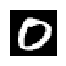

In [7]:
with mpl.rc_context(fname="../../../.matplotlibrc"): 
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 0.6))
    _ = ax.imshow(1-np.reshape(images_trained[ind], (28, 28)), cmap="Greys")
    _ = ax.spines["top"].set_visible(False)
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_yticks([])
    _ = ax.set_xticks([])
    # plt.savefig("../svg/panel_a0.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [8]:
i_delay = 0.1
i_dur = 1.0
dt = 0.025
t_max = 10.01
i_amp = 4 / 50 / 500
stim1 = jx.step_current(i_delay, i_dur, i_amp, dt, t_max)
time_vec = np.arange(0, t_max+2*dt, dt)

2024-06-13 19:45:06.573800: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


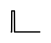

In [9]:
with mpl.rc_context(fname="../../../.matplotlibrc"): 
    fig, ax = plt.subplots(1, 1, figsize=(0.4, 0.3))
    _ = ax.plot(time_vec[:-1], stim1, color="k")
    _ = ax.set_yticks([])
    _ = ax.set_xticks([])
    _ = ax.spines["top"].set_visible(False)
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    # plt.savefig("../svg/panel_a01.svg", bbox_inches="tight", transparent=True)
    plt.show()

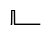

In [10]:
with mpl.rc_context(fname="../../../.matplotlibrc"): 
    fig, ax = plt.subplots(1, 1, figsize=(0.4, 0.2))
    _ = ax.plot(time_vec[:-1], stim1, color="k")
    _ = ax.set_yticks([])
    _ = ax.set_xticks([])
    _ = ax.spines["top"].set_visible(False)
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    # plt.savefig("../svg/panel_a02.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [11]:
# max_value_every_cell = jnp.max(traces_trained[ind], axis=1)
# with open("../../paper/fig6_mnist/results/traces/v_all_compartments.pkl", "rb") as handle:
#     every_comp_voltage = pickle.load(handle)[0]

every_comp_voltage = traces_trained[ind]

In [12]:
every_comp_voltage = traces_trained[ind]

min_val = 40
max_val = 450

spike_time = jnp.argmax(every_comp_voltage, axis=1)
is_no_spike = jnp.max(every_comp_voltage, axis=1) < 20.0
spike_time = spike_time.at[is_no_spike].set(max_val)

diff = max_val - min_val
spike_time_zscored = (spike_time - min_val) / diff
spike_time_zscored = 1 - spike_time_zscored
cmap = plt.get_cmap("inferno")

spike_time_zscored = spike_time_zscored.at[-10:].set(every_comp_voltage[-10:, -1])
spike_time_zscored = spike_time_zscored.at[-10:].add(150.0)
spike_time_zscored = spike_time_zscored.at[-10:].divide(10.0)

In [13]:
with open("../results/01_network.pkl", "rb") as handle:
    net = pickle.load(handle)

net.compute_xyz()
for i in range(28**2):
    net.cell(i).move((i % 28) * 10, 15.5 * i - (i // 28) * 300, 0)
for counter, i in enumerate(range(28**2, 28**2 + 64)):
    net.cell(i).rotate(270)
    net.cell(i).move(1150, 5 * 784 / 64 * counter, 0)
net.cell(28**2).move(-300, 0, 0)
net.cell(28**2+18).move(-600, 0, 0)
net.cell(28**2+44).move(-600, 0, 0)
net.cell(28**2+52).move(-400, 0, 0)
net.cell(28**2+55).move(-400, 0, 0)
for counter, i in enumerate(range(28**2 + 64, 28**2 + 64 + 10)):
    net.cell(i).move(1600, 5 * 784 / 10 * counter + 150, 0)

FileNotFoundError: [Errno 2] No such file or directory: '../results/01_network.pkl'

In [14]:
_ = np.random.seed(0)
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.6, 3.6))
    for i in range(28**2):
        ax = net.cell(i).vis(ax=ax, col=cmap(normalized_max[i]), morph_plot_kwargs={"linewidth": 0.3})
    for counter, i in enumerate(range(28**2, 28**2+64)):
        ax = net.cell(i).vis(ax=ax, col=cmap(normalized_max[i]), morph_plot_kwargs={"linewidth": 0.3, "zorder": 1-normalized_max[i] + np.random.rand() * 3.0})

    for i in range(28**2+64, 28**2+64+10):
        ax = net.cell(i).vis(ax=ax, col=cmap(normalized_max[i]), morph_plot_kwargs={"linewidth": 0.3})
    for i in range(28**2+64, 28**2+64+10):
        ax = net[i, 0, 3].vis(ax=ax, col=cmap(normalized_max[i]), morph_plot_kwargs={"s": 3.})

    _ = ax.set_xlim([0, 2200])
    _ = ax.set_ylim([-200, 4200])
    _ = ax.spines["top"].set_visible(False)
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_yticks([])
    _ = ax.set_xticks([])
    # plt.savefig("../svg/panel_a1.svg", bbox_inches="tight", transparent=True)
    plt.show()

NameError: name 'net' is not defined

### Panel b

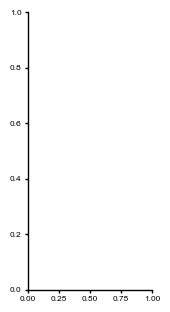

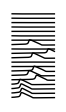

In [15]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
    for i in range(20):
        _ = ax.plot(time_vec, i * 100 + traces_trained[ind, 150+i, :].T, c="k")
        _ = ax.spines["top"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)

    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)

    # plt.savefig("../svg/panel_a2.svg", bbox_inches="tight", transparent=True)
    plt.show()

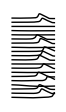

In [16]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
    for i in range(20):
        _ = ax.plot(time_vec, i * 100 + traces_trained[ind, 28**2 + 10 + i, :].T, c="k")
        _ = ax.spines["top"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)

    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)

    _ = ax.set_xticks([])

    # plt.savefig("../svg/panel_a3.svg", bbox_inches="tight", transparent=True)
    plt.show()

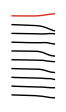

In [17]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
    for i in range(10):
        c = "#d7301f" if 9 - i == labels_trained[ind] else "k"
        _ = ax.plot(time_vec, i * 70 + traces_trained[ind, -i-1, :].T, c=c)
        _ = ax.spines["top"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)

    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.spines["right"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)

    _ = ax.set_xticks([])

    # plt.savefig("../svg/panel_a4.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel c

label 0


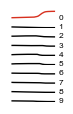

In [18]:
from jax.scipy.special import logsumexp

print("label", labels_trained[ind])
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(10, 1, figsize=(0.6, 1.2))
    for i in range(10):
        c = "#d7301f" if 9 - i == labels_trained[ind] else "k"
        prediction = (traces_trained[ind, -i-1] + 65) / 3.0
        all_traces = (traces_trained[ind, -10:] + 65) / 3.0
        softmaxed_trace = prediction - logsumexp(all_traces, axis=0)
        softmaxed_trace = jnp.exp(softmaxed_trace)
        _ = ax[9-i].plot(time_vec, softmaxed_trace, c=c)
        _ = ax[i].set_yticks([-0.1, 1.2])
        _ = ax[i].set_yticks([])
        _ = ax[i].set_ylim([-0.1, 1.2])
        _ = ax[i].spines["top"].set_visible(False)
        _ = ax[i].spines["left"].set_visible(False)

    for i in range(10):
        _ = ax[i].text(11, -0.2, i)
        _ = ax[i].set_xticks([])
        _ = ax[i].set_yticks([])
        _ = ax[i].spines["right"].set_visible(False)
        _ = ax[i].spines["bottom"].set_visible(False)

    plt.subplots_adjust(hspace=0.0)
    # plt.savefig("../svg/panel_a5.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel d

In [19]:
import scipy

In [20]:
_ = np.random.seed(0)
lin_acc = np.asarray([0.927     , 0.9263    , 0.9271    , 0.9271    , 0.9274    ,
        0.9267    , 0.9255    , 0.92539996, 0.9271    , 0.9264    ,
        0.9273    , 0.92719996, 0.9259    , 0.9267    , 0.9267    ,
        0.9273    , 0.92579997, 0.92759997, 0.9274    , 0.9263    ,
        0.9259    , 0.9259    , 0.92679995, 0.92689997, 0.9255    ,
        0.92679995, 0.92719996, 0.9267    , 0.928     , 0.926     ,
        0.9267    , 0.9264    , 0.92539996, 0.9287    , 0.92609996,
        0.92789996, 0.92649996, 0.92719996, 0.9273    , 0.9262    ,
        0.927     , 0.9264    , 0.926     , 0.9259    , 0.92609996,
        0.92749995, 0.9252    , 0.9274    , 0.9255    , 0.9253    ])
mlp_acc = np.asarray([0.97779995, 0.97859997, 0.979     , 0.9783    , 0.97819996,
        0.9787    , 0.9784    , 0.9808    , 0.97919995, 0.97859997,
        0.97919995, 0.9788    , 0.97819996, 0.97919995, 0.9806    ,
        0.97849995, 0.97919995, 0.9805    , 0.97889996, 0.97709996,
        0.9777    , 0.9784    , 0.9766    , 0.97779995, 0.9809    ,
        0.9791    , 0.9791    , 0.98099995, 0.9777    , 0.97919995,
        0.97959995, 0.97819996, 0.978     , 0.97919995, 0.97919995,
        0.9794    , 0.9799    , 0.9788    , 0.97889996, 0.97849995,
        0.97789997, 0.978     , 0.97929996, 0.97749996, 0.97709996,
        0.9788    , 0.97849995, 0.97779995, 0.97779995, 0.9769    ])
biophys_acc = 0.958

eval_x = np.linspace(0.9, 1.0, 100)
kde_sigma = 0.0003
lin_val = np.mean(np.asarray([scipy.stats.norm(val, kde_sigma).pdf(eval_x) for val in lin_acc]), axis=0)
mlp_val = np.mean(np.asarray([scipy.stats.norm(val, kde_sigma).pdf(eval_x) for val in mlp_acc]), axis=0)

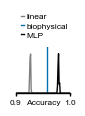

In [21]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.7, 0.6))
    _ = ax.plot(eval_x, lin_val, color="gray")
    _ = ax.axvline(biophys_acc, color=papercols["jaxley"])
    _ = ax.plot(eval_x, mlp_val, color="k")
    # for linear in lin_acc[::5]:
    #     _ = ax.axvline(linear, ymax=0.1, color="gray", linewidth=0.1)
    # for mlp in mlp_acc[::5]:
    #     _ = ax.axvline(mlp, ymax=0.1, color="k", linewidth=0.1)
    _ = ax.set_xlim([0.9, 1.0])
    _ = ax.set_xticks([0.9, 1.0])
    _ = ax.legend(
        ["linear", "biophysical", "MLP"],
        loc="upper right",
        bbox_to_anchor=[1.1, 1.9, 0.0, 0.0],
        handlelength=0.4,
        handletextpad=0.3,
        ncol=1,
        columnspacing=0.5,
        labelspacing=0.3,
    )
    _ = ax.set_ylim([0, 500])
    _ = ax.spines["left"].set_visible(False)
    _ = ax.set_xlabel("Accuracy", labelpad=-4)
    _ = ax.set_yticks([])
    # plt.savefig("../svg/panel_d.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel e

In [22]:
with open("../../../nex/ca1net/results/parameters/TrainingRun_0010/chkpts/005/parameters_0900", "rb") as handle:
    parameters = pickle.load(handle)

with open("../../../nex/ca1net/results/parameters/TrainingRun_0010/chkpts/005/initial_parameters", "rb") as handle:
    initial_parameters = pickle.load(handle)

In [23]:
param_values = {"untrained": {}, "trained": {}}
for trained, params in zip(["untrained", "trained"], [initial_parameters, parameters]):
    param_values[trained]["conns1"] = np.concatenate([params[0]["Conns1_exc_gS"], params[1]["Conns1_inh_gS"]]) * 1000
    param_values[trained]["conns2"] = np.concatenate([params[2]["Conns2_exc_gS"], params[3]["Conns2_inh_gS"]]) * 1000
    param_values[trained]["na"] = params[4]["HH_gNa"]
    param_values[trained]["k"] = params[5]["HH_gK"]
    param_values[trained]["leak"] = params[6]["HH_gLeak"]
    param_values[trained]["ra"] = params[7]["axial_resistivity"]

key untrained
key trained


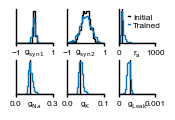

In [24]:
bounds = {
    "conns1": [-0.001 * 1000, 0.001 * 1000],
    "conns2": [-0.001 * 1000, 0.001 * 1000],
    "ra": [0, 1000],
    "na": [0, 0.3],
    "k": [0, 0.1],
    "leak": [0, 0.001],
}

labelpad=-5
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 3, figsize=(1.8, 1.1))
    for key, p in param_values.items():
        print("key", key)
        col = "k" if key == "untrained" else papercols["jaxley"]
        _ = ax[0, 0].hist(param_values[key]["conns1"], color=col, histtype="step", range=bounds["conns1"], bins=30)
        _ = ax[0, 0].set_xlim(bounds["conns1"])
        _ = ax[0, 0].set_xticks(bounds["conns1"])
        _ = ax[0, 0].set_xlabel(r"$g_{\mathrm{syn1}}$", labelpad=labelpad)
        _ = ax[0, 1].hist(param_values[key]["conns2"], color=col, histtype="step", range=bounds["conns2"], bins=30)
        _ = ax[0, 1].set_xlim(bounds["conns2"])
        _ = ax[0, 1].set_xticks(bounds["conns2"])
        _ = ax[0, 1].set_xlabel(r"$g_{\mathrm{syn2}}$", labelpad=labelpad)
        if key == "trained":
            _ = ax[0, 2].hist(param_values[key]["ra"], color=col, histtype="step", range=bounds["ra"], bins=30)
            _ = ax[0, 2].set_xlim(bounds["ra"])
            _ = ax[0, 2].set_xticks(bounds["ra"])
            _ = ax[0, 2].set_xlabel(r"$r_a$", labelpad=labelpad)
            _ = ax[1, 0].hist(param_values[key]["na"], color=col, histtype="step", range=bounds["na"], bins=30)
            _ = ax[1, 0].set_xlim(bounds["na"])
            _ = ax[1, 0].set_xticks(bounds["na"])
            _ = ax[1, 0].set_xlabel(r"$g_{\mathrm{Na}}$", labelpad=labelpad)
            _ = ax[1, 1].hist(param_values[key]["k"], color=col, histtype="step", range=bounds["k"], bins=30)
            _ = ax[1, 1].set_xlim(bounds["k"])
            _ = ax[1, 1].set_xticks(bounds["k"])
            _ = ax[1, 1].set_xlabel(r"$g_{\mathrm{K}}$", labelpad=labelpad)
            _ = ax[1, 2].hist(param_values[key]["leak"], color=col, histtype="step", range=bounds["leak"], bins=30)
            _ = ax[1, 2].set_xlim(bounds["leak"])
            _ = ax[1, 2].set_xticks(bounds["leak"])
            _ = ax[1, 2].set_xlabel(r"$g_{\mathrm{Leak}}$", labelpad=labelpad)
        else:
            _ = ax[0, 2].axvline(param_values[key]["ra"][0], color=col)
            _ = ax[0, 2].axvline(param_values[key]["ra"][0] - 1000, color=papercols["jaxley"])
            _ = ax[1, 0].axvline(param_values[key]["na"][0], color=col)
            _ = ax[1, 1].axvline(param_values[key]["k"][0], color=col)
            _ = ax[1, 2].axvline(param_values[key]["leak"][0], color=col)
    for i in range(2):
        for j in range(3):
            _ = ax[i, j].set_yticks([])
    ax[1, 2].set_xticklabels(["0", "0.001"])
    _ = ax[0, 2].legend(
        ["Initial", "Trained"],
        handlelength=0.3,
        loc="upper right",
        bbox_to_anchor=[1.35, 1.1, 0.0, 0.0],
        handletextpad=0.3,
        labelspacing=0.1,
    )
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    # plt.savefig("../svg/panel_e.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel f

In [25]:
with open("../results/accuracies/dropout_accuracies.pkl", "rb") as handle:
    accuracies = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: '../results/accuracies/dropout_accuracies.pkl'

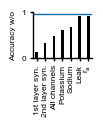

In [374]:
num_ablations = len(accuracies.keys())
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.77, 0.6))
    dropout_accuracies = np.asarray(list(accuracies.values())[1:])
    names = np.asarray(["1st layer syn." , "2nd layer syn.", "Sodium", "Potassium", "Leak", "All channels", r"$r_a$"])
    sorting = np.argsort(dropout_accuracies)
    dropout_accuracies = dropout_accuracies[sorting]
    names = names[sorting]
    _ = ax.axhline(accuracies["all"], color=papercols["jaxley"])
    _ = ax.bar(
        np.arange(1, num_ablations),
        dropout_accuracies,
        color="k",
        width=0.3,
    )
    _ = ax.set_xticks(np.arange(1, num_ablations))
    _ = ax.set_xticklabels(names, rotation=90)
    _ = ax.set_ylabel("Accuracy w/o")
    # _ = ax.set_title("Reset parameters to init")
    _ = ax.set_ylim([0, 1])
    _ = ax.set_yticks([0, 1])
    
    plt.savefig("../svg/panel_f.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel g

In [26]:
with open("../results/traces/output_trained.pkl", "rb") as handle:
    output_trained = pickle.load(handle)

with open("../results/traces/images_trained.pkl", "rb") as handle:
    images_trained = pickle.load(handle)

with open("../results/traces/labels_trained.pkl", "rb") as handle:
    labels_trained = pickle.load(handle)

hidden_neuron_activities = output_trained[:, :64, :]

In [220]:
plt.rcParams['figure.dpi'] = 150

In [221]:
plt.rcParams["font.size"] = 6

In [361]:
from dataclasses import dataclass

@dataclass
class Tuning:
    labels: list = None
    activity: list = None

    def __init__(self, labels, activity):
        self.labels = labels
        self.activity = activity
        self.time = np.arange(activity.shape[-1]) * 0.025
    
    def __getitem__(self, key):
        index = np.where(self.labels == key)
        return Tuning(np.ones_like(index) * key, self.activity[index])

    def peak(self):
        return Tuning(self.labels, self.activity.max(axis=-1, keepdims=True))

    def average(self):
        return Tuning(self.labels, self.activity.mean(axis=-1, keepdims=True))

    def spike(self, thresh=20.0):
        return Tuning(self.labels, np.any(self.activity > thresh, axis=2, keepdims=True))

    def spike_timing(self):
        spikes = self.spike().activity
        argmax = np.argmax(self.activity, axis=-1, keepdims=True)
        times = self.time[argmax]
        times[~spikes] = 0
        return Tuning(self.labels, times)

    @property
    def shape(self):
        return self.activity.shape

    def max(self, axis):
        return Tuning(self.labels, self.activity.max(axis=axis, keepdims=True))

    def mean(self, axis):
        return Tuning(self.labels, self.activity.mean(axis=axis, keepdims=True))

In [362]:
activity = Tuning(labels_trained, hidden_neuron_activities)

## peak coding

In [363]:
peak = activity.peak()

In [364]:
heatmap = []
for label in np.arange(0, 10):
    heatmap.append(peak[label].activity.mean(axis=0).flatten())
heatmap = np.array(heatmap)

In [365]:
most_to_least_active_id = np.argsort(heatmap.sum(axis=0))

In [366]:
heatmap = heatmap[:, most_to_least_active_id]

Text(0.5, 1.0, 'peak coding')

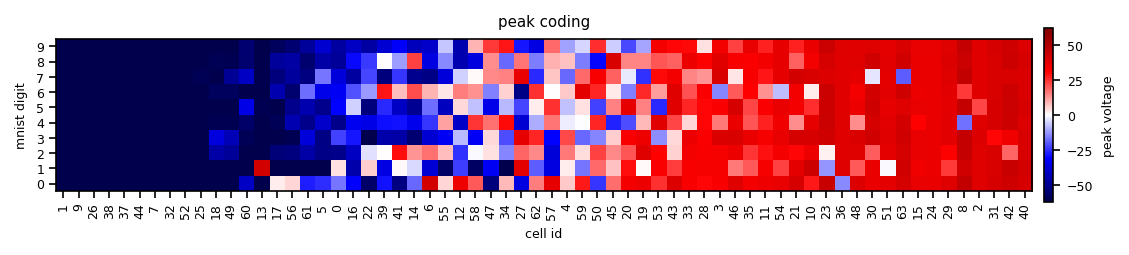

In [367]:
plt.figure(figsize=[10, 10])
plt.imshow(heatmap, origin="lower", cmap=plt.cm.seismic, vmin=-62, vmax=62)
plt.yticks(np.arange(0, 10))
plt.xticks(np.arange(64), labels = most_to_least_active_id, rotation=90)
plt.tick_params(axis='both', pad=2)
plt.colorbar(shrink=0.15, pad=0.01, label="peak voltage")
plt.xlabel("cell id")
plt.ylabel("mnist digit")
plt.title('peak coding')

## mean coding

In [368]:
average = activity.average()

In [369]:
heatmap2 = []
for label in np.arange(0, 10):
    heatmap2.append(average[label].activity.mean(axis=0).flatten())
heatmap2 = np.array(heatmap2)

In [370]:
# most_to_least_active_id = np.argsort(heatmap2.sum(axis=0))

In [371]:
heatmap2 = heatmap2[:, most_to_least_active_id]

Text(0.5, 1.0, 'mean coding')

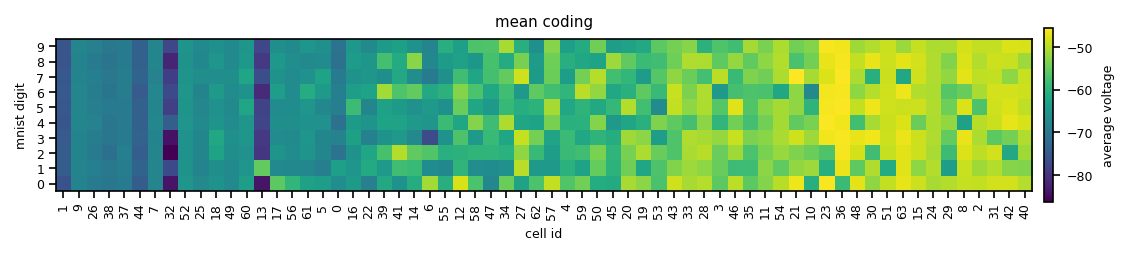

In [372]:
plt.figure(figsize=[10, 10])
plt.imshow(heatmap2, origin="lower")
plt.yticks(np.arange(0, 10))
plt.xticks(np.arange(64), labels = most_to_least_active_id, rotation=90)
plt.tick_params(axis='both', pad=2)
plt.colorbar(shrink=0.15, pad=0.01, label="average voltage")
plt.xlabel("cell id")
plt.ylabel("mnist digit")
plt.title('mean coding')

In [373]:
np.corrcoef(heatmap.flatten(), heatmap2.flatten())

array([[1.        , 0.92683629],
       [0.92683629, 1.        ]])

## spike ratio

In [374]:
spike = activity.spike()

In [375]:
spike.activity.shape

(2560, 64, 1)

In [376]:
heatmap4 = []
for label in np.arange(0, 10):
    heatmap4.append(spike[label].activity.mean(axis=0).flatten())
heatmap4 = np.array(heatmap4)

In [377]:
# most_to_least_active_id = np.argsort(heatmap4.sum(axis=0))

In [378]:
heatmap4 = heatmap4[:, most_to_least_active_id]

Text(0.5, 1.0, 'spike ratio')

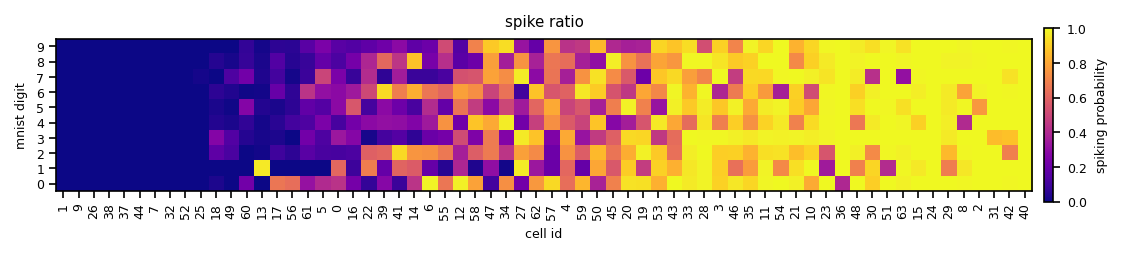

In [379]:
plt.figure(figsize=[10, 10])
plt.imshow(heatmap4, origin="lower", cmap= plt.cm.plasma)
plt.yticks(np.arange(0, 10))
plt.xticks(np.arange(64), labels = most_to_least_active_id, rotation=90)
plt.tick_params(axis='both', pad=2)
plt.colorbar(shrink=0.15, pad=0.01, label="spiking probability")
plt.xlabel("cell id")
plt.ylabel("mnist digit")
plt.title('spike ratio')

## spike timing

In [380]:
spike_times = activity.spike_timing()

In [381]:
spike_times.activity.shape

(2560, 64, 1)

In [382]:
heatmap4 = []
for label in np.arange(0, 10):
    heatmap4.append(spike_times[label].activity.mean(axis=0).flatten())
heatmap4 = np.array(heatmap4)

In [383]:
# most_to_least_active_id = np.argsort(heatmap4.sum(axis=0))

In [384]:
heatmap4 = heatmap4[:, most_to_least_active_id]

Text(0.5, 1.0, 'spike timing')

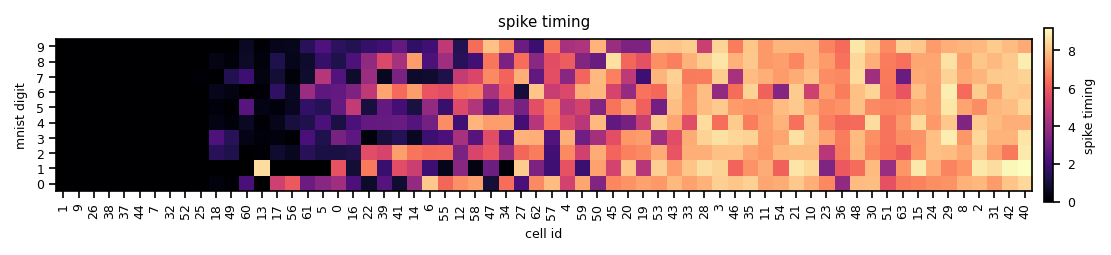

In [386]:
plt.figure(figsize=[10, 10])
plt.imshow(heatmap4, origin="lower", cmap=plt.cm.magma)
plt.yticks(np.arange(0, 10))
plt.xticks(np.arange(64), labels = most_to_least_active_id, rotation=90)
plt.tick_params(axis='both', pad=2)
plt.colorbar(shrink=0.15, pad=0.01, label="spike timing")
plt.xlabel("cell id")
plt.ylabel("mnist digit")
plt.title('spike timing')

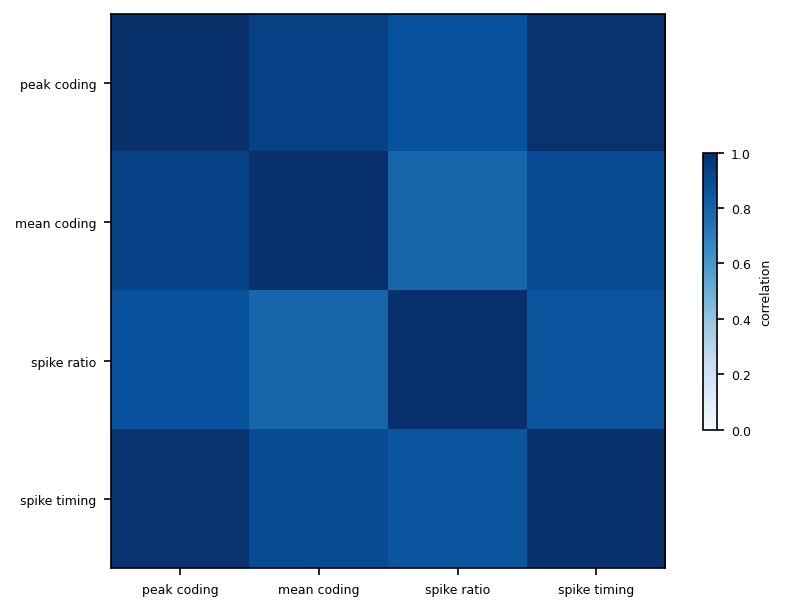

In [389]:
plt.imshow(np.corrcoef([heatmap.flatten(), heatmap2.flatten(), heatmap3.flatten(), heatmap4.flatten()]), vmin=0, vmax=1, cmap=plt.cm.Blues)
plt.xticks(np.arange(4), ["peak coding", "mean coding", "spike ratio", "spike timing"])
plt.yticks(np.arange(4), ["peak coding", "mean coding", "spike ratio", "spike timing"])
plt.colorbar(label="correlation", shrink=0.5)

In [241]:
most_to_least_active_id = np.argsort(heatmap.sum(axis=0))

In [242]:
heatmap = heatmap[:, most_to_least_active_id]

Text(0.5, 1.0, 'average coding')

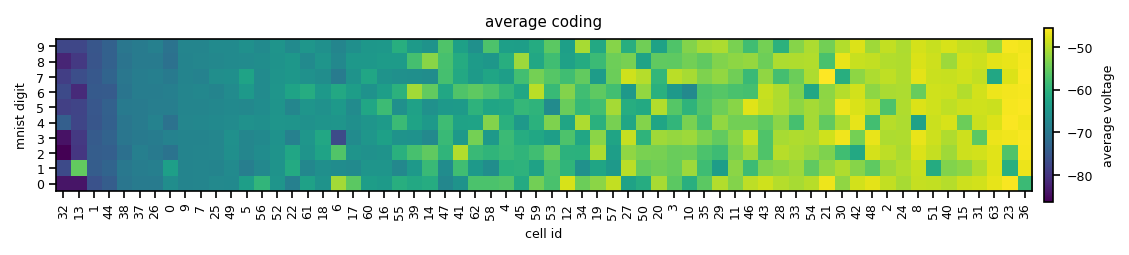

In [245]:
plt.figure(figsize=[10, 10])
plt.imshow(heatmap, origin="lower")
plt.yticks(np.arange(0, 10))
plt.xticks(np.arange(64), labels = most_to_least_active_id, rotation=90)
plt.tick_params(axis='both', pad=2)
plt.colorbar(shrink=0.15, pad=0.01, label="average voltage")
plt.xlabel("cell id")
plt.ylabel("mnist digit")
plt.title('average coding')

In [47]:
%matplotlib inline

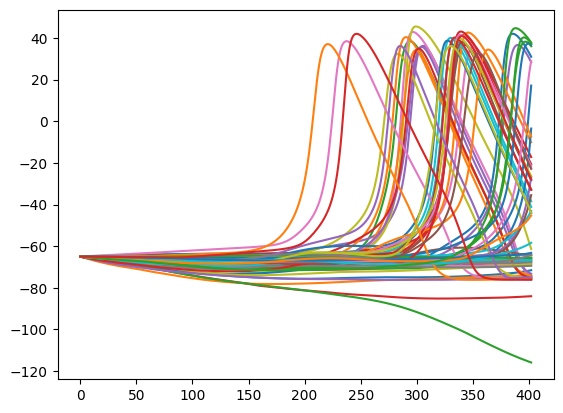

In [52]:
plt.plot(hidden_neuron_activities[0, :, :].T)
plt.show()

In [27]:
def compute_tuning(neuron_id):
    tunings = []
    for label in range(10):
        image_is_digit = np.asarray(labels_trained == label)
        avg_hidden_activities = np.mean(np.any(hidden_neuron_activities[image_is_digit, neuron_id] > 20.0, axis=1), axis=0)
        tunings.append(avg_hidden_activities)
    return np.asarray(tunings)

neuron_id1 = 13
neuron_id2 = 36
tunings1 = compute_tuning(neuron_id1)
tunings2 = compute_tuning(neuron_id2)

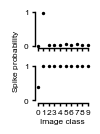

In [28]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(0.65, 1.15))
    ax[0].scatter(np.arange(10), tunings1, marker="o", c="k", clip_on=False, s=2.0)
    ax[1].scatter(np.arange(10), tunings2, marker="o", c="k", clip_on=False, s=2.0)
    for i in range(2):
        ax[i].set_xticks(np.arange(10))
        ax[i].set_yticks([0, 1])
        ax[i].set_ylim([0, 1])
        ax[i].set_xlim([0, 9])
        for line in ["left","bottom"]:
            ax[i].spines[line].set_position(("outward", 2.0))
    ax[0].set_xticklabels([])
    ax[1].set_ylabel(r"$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$"+"Spike probability", labelpad=2)
    ax[1].set_xlabel("Image class", labelpad=2)
    plt.subplots_adjust(hspace=0.6)
    # plt.savefig("../svg/panel_g.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [29]:
fnames = ['morphologies/n171/n171.CNG.swc','morphologies/n174/n174.CNG.swc','morphologies/n130/n130.CNG.swc','morphologies/n400/n400.CNG.swc','morphologies/n404/n404.CNG.swc','morphologies/n140/n140.CNG.swc','morphologies/n127/n127.CNG.swc','morphologies/n122/n122.CNG.swc',
         'morphologies/n412/n412.CNG.swc','morphologies/n125/n125.CNG.swc','morphologies/n403/n403.CNG.swc','morphologies/n420/n420.CNG.swc','morphologies/n407/n407.CNG.swc','morphologies/n417/n417.CNG.swc','morphologies/n144/n144.CNG.swc','morphologies/n141/n141.CNG.swc',
         'morphologies/n145/n145.CNG.swc','morphologies/n410/n410.CNG.swc','morphologies/n129/n129.CNG.swc','morphologies/n416/n416.CNG.swc','morphologies/n414/n414.CNG.swc','morphologies/n408/n408.CNG.swc','morphologies/n142/n142.CNG.swc','morphologies/n406/n406.CNG.swc','morphologies/n179/n179.CNG.swc',
         'morphologies/n177/n177.CNG.swc','morphologies/n411/n411.CNG.swc','morphologies/n181/n181.CNG.swc','morphologies/n184/n184.CNG.swc','morphologies/n402/n402.CNG.swc','morphologies/n176/n176.CNG.swc','morphologies/n409/n409.CNG.swc','morphologies/n415/n415.CNG.swc','morphologies/n422/n422.CNG.swc',
         'morphologies/n123/n123.CNG.swc','morphologies/n121/n121.CNG.swc','morphologies/n401/n401.CNG.swc','morphologies/n128/n128.CNG.swc','morphologies/n421/n421.CNG.swc','morphologies/n418/n418.CNG.swc','morphologies/n126/n126.CNG.swc','morphologies/n172/n172.CNG.swc','morphologies/n413/n413.CNG.swc','morphologies/n170/n170.CNG.swc',
         'morphologies/n175/n175.CNG.swc','morphologies/n178/n178.CNG.swc','morphologies/n173/n173.CNG.swc','morphologies/n405/n405.CNG.swc','morphologies/n183/n183.CNG.swc','morphologies/n143/n143.CNG.swc','morphologies/n180/n180.CNG.swc','morphologies/n419/n419.CNG.swc','morphologies/n120/n120.CNG.swc','morphologies/n423/n423.CNG.swc',
         'morphologies/n182/n182.CNG.swc']

In [30]:
cell1 = jx.read_swc("../../../nex/ca1net/"+fnames[neuron_id1], nseg=4, assign_groups=True)
cell2 = jx.read_swc("../../../nex/ca1net/"+fnames[neuron_id2], nseg=4, assign_groups=True)

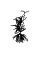

In [31]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.25, 0.5))
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    ax = cell1.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.1})
    _ = ax.set_xlim([-200, 200])
    _ = ax.set_ylim([-300, 500])
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # plt.savefig("../svg/panel_g2.svg", bbox_inches="tight", transparent=True)
    plt.show()

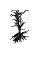

In [32]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.25, 0.5))
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    ax = cell2.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.1})
    _ = ax.set_xlim([-200, 200])
    _ = ax.set_ylim([-300, 500])
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # plt.savefig("../svg/panel_g3.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel h

In [33]:
from jax.nn import sigmoid

def tf_image(image):
    image = sigmoid(image)
    return image

In [34]:
time_vec = np.arange(0, 10.05+0.025, 0.025)

epsilon = 5
image_ind = 8  # 8 is good

with open(f"../results/attacks/attack_image_before_seed2.pkl", "rb") as handle:
    image_before = pickle.load(handle)[image_ind]
with open(f"../results/attacks/attack_trace_before_seed2.pkl", "rb") as handle:
    traces_before = pickle.load(handle)[image_ind]

with open(f"../results/attacks/all_images_seed2.pkl", "rb") as handle:
    all_adv_images = np.asarray(pickle.load(handle))
with open(f"../results/attacks/all_traces_seed2.pkl", "rb") as handle:
    all_adv_traces = np.asarray(pickle.load(handle))

with open(f"../results/attacks/initial_labels_seed2.pkl", "rb") as handle:
    initial_labels = pickle.load(handle)
with open(f"../results/attacks/target_labels_seed2.pkl", "rb") as handle:
    target_labels = pickle.load(handle)

image_after = all_adv_images[epsilon, image_ind]
traces_after = all_adv_traces[epsilon, image_ind]

FileNotFoundError: [Errno 2] No such file or directory: '../results/attacks/attack_image_before_seed2.pkl'

In [35]:
initial_label = initial_labels[image_ind]
target_label = target_labels[image_ind]
print("initial_label", initial_label, "target", target_label)

NameError: name 'initial_labels' is not defined

In [36]:
from jax.scipy.special import logsumexp
from copy import deepcopy


def softmax(traces, label):
    traces += 65.0
    traces /= 3.0
    true = traces[label][-1]
    return np.exp(true - logsumexp(traces[-10:, -1:]))
    
prob_true_before = softmax(deepcopy(traces_before), initial_label)
prob_false_before = softmax(deepcopy(traces_before), target_label)

prob_true_after = softmax(deepcopy(traces_after), initial_label)
prob_false_after = softmax(deepcopy(traces_after), target_label)

NameError: name 'traces_before' is not defined

In [37]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 2, figsize=(2.0, 0.5))
    _ = ax[0].imshow(1-np.reshape(tf_image(image_before), (28, 28)), cmap="Greys")
    _ = ax[1].imshow(1-np.reshape(tf_image(image_after), (28, 28)), cmap="Greys")
    _ = ax[0].text(28, 3, f"p(6)={prob_true_before:.2f}")
    _ = ax[0].text(28, 9, f"p(4)={prob_false_before:.2f}")
    _ = ax[0].text(32, 19, "Maximize")
    _ = ax[0].text(40, 24, "p(4)")
    _ = ax[1].text(29, 3, f"p(6)={prob_true_after:.2f}")
    _ = ax[1].text(29, 9, f"p(4)={prob_false_after:.2f}")
    for i in range(2):
        _ = ax[i].set_xticks([])
        _ = ax[i].set_yticks([])
        _ = ax[i].spines["left"].set_visible(False)
        _ = ax[i].spines["bottom"].set_visible(False)
    plt.subplots_adjust(wspace=0.3)
    # plt.savefig("../svg/panel_h1.svg", bbox_inches="tight", transparent=True)
    plt.show()

NameError: name 'image_before' is not defined

In [38]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 2, figsize=(1.7, 0.50))
    all_ = np.arange(10)
    all_ = np.delete(all_, initial_label)
    all_ = np.delete(all_, target_label)
    inds = np.concatenate([np.asarray([initial_label]), np.asarray([target_label]), all_])
    for rec in inds:
        if rec == initial_label:
            col = "#d7301f"
            alpha = 1.0
            zorder = 1000
        elif rec == target_label:
            col = "k"
            alpha = 1.0
            zorder = 1000
        else:
            col = "k"
            alpha = 0.1
            zorder = 100

        _ = ax[0].plot(time_vec, traces_before[rec], color=col, alpha=alpha, zorder=zorder)
        _ = ax[1].plot(time_vec, traces_after[rec], color=col, alpha=alpha, zorder=zorder)

    for i in range(2):
        _ = ax[i].set_ylim([-90, -45])
        _ = ax[i].set_yticks([-90, -45])
        _ = ax[i].set_xlim([0, 10])
        _ = ax[i].set_xticks([0, 10])

    _ = ax[0].legend(
        [initial_label, target_label],
        loc="upper right",
        bbox_to_anchor=[0.83, 1.2, 0.0, 0.0],
        ncol=2,
        handlelength=0.6,
        handletextpad=0.3,
        columnspacing=0.5,
    )

    _ = ax[1].set_yticklabels([])
    _ = ax[1].set_xticklabels([])
    _ = ax[0].set_xlabel("Time (ms)", labelpad=-3)
    _ = ax[0].set_ylabel("Voltage\n(mV)", labelpad=-10)
    plt.subplots_adjust(wspace=0.6)
    # plt.savefig("../svg/panel_h2.svg", bbox_inches="tight", transparent=True)
    plt.show()

NameError: name 'initial_label' is not defined

### Panel i

In [39]:
from nex.colors import cols as papercols

with open("../results/adv_attacks/ann_accuracies.pkl", "rb") as handle:
    ann_adv_accuracies = pickle.load(handle)

biophys_accuracies = []
for seed in range(1, 9):
    with open(f"../results/attacks/all_accuracies_seed{seed}.pkl", "rb") as handle:
        biophys_accuracies.append(pickle.load(handle))
biophys_accuracies = np.mean(np.asarray(biophys_accuracies), axis=0)
lr = 5.0
epsilon = np.arange(0, len(ann_adv_accuracies) * lr, lr)

FileNotFoundError: [Errno 2] No such file or directory: '../results/adv_attacks/ann_accuracies.pkl'

In [40]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.8, 0.6))
    _ = ax.plot(epsilon[:20], biophys_accuracies[:20], marker="o", color=papercols["jaxley"], markersize=1.0, clip_on=False, zorder=2)
    _ = ax.plot(epsilon[:20], ann_adv_accuracies[:20], marker="o", color="k", markersize=1.0, clip_on=False, zorder=1)
    _ = ax.set_xlabel("Norm of\nperturbation", labelpad=-5)
    _ = ax.set_ylabel("Accuracy", labelpad=0)
    _ = ax.set_ylim([0, 1])
    _ = ax.set_yticks([0, 1])
    _ = ax.set_xlim([0, 100])
    _ = ax.set_xticks([0, 100])
    _ = ax.spines["bottom"].set_position(("outward", 2.0))
    _ = ax.spines["left"].set_position(("outward", 2.0))
    _ = ax.legend(
        ["Biophys.", "MLP"],
        loc="upper right",
        bbox_to_anchor=[1.18, 1.1, 0.0, 0.0],
        handlelength=0.8,
        handletextpad=0.3,
        labelspacing=0.1,
    )
    # plt.savefig("../svg/panel_i.svg", bbox_inches="tight", transparent=True)
    plt.show()

TypeError: 'int' object is not subscriptable

# Assemble figure

In [41]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "18.0cm",
    "7.3cm",

    Panel(SVG("../svg/panel_a1_annotated_png.svg").scale(svg_scale).move(0, -3)),
    Panel(
        Text("a", 11, 0.0, **kwargs_text),
        Text("Biophysical network to classify MNIST", 22, 0.0, **kwargs_text_normal),
    ).move(-10, 8),
    # Panel(SVG("../svg/panel_a0.svg").scale(0.8).move(0, 120)),
    # Panel(SVG("../svg/panel_a01.svg").scale(svg_scale).move(2, 80)),
    # Panel(SVG("../svg/panel_a02.svg").scale(svg_scale).move(2, 160)),

    Panel(
        Text("b", 11, 0.0, **kwargs_text),
        Text("Single neuron activity", 55, 0.0, **kwargs_text_normal),
    ).move(160, 8),
    Panel(
        Text("Input layer", 0, 0.0, **kwargs_text_normal),
        Text("Hidden layer", 50, 0.0, **kwargs_text_normal),
        Text("Output layer", 104, 0.0, **kwargs_text_normal),
        Text("Softmax", 182, -12.0, **kwargs_text_normal),
        Text("probabilities", 177, -4.0, **kwargs_text_normal),
    ).move(184, 20),
    Panel(SVG("../svg/panel_a2.svg").scale(svg_scale).move(170, 15)),
    Panel(SVG("../svg/panel_a3.svg").scale(svg_scale).move(225, 15)),
    Panel(SVG("../svg/panel_a4.svg").scale(svg_scale).move(280, 15)),

    Text("c", 350, 8.0, **kwargs_text),
    Panel(SVG("../svg/panel_a5.svg").scale(svg_scale).move(350, 10)),

    Panel(
        Text("d", 11, 0.0, **kwargs_text),
        Text("Performance", 25, 0.0, **kwargs_text_normal),
    ).move(423, 8),
    Panel(SVG("../svg/panel_d.svg").scale(svg_scale).move(430, 12)),

    Panel(
        Text("e", 0, 0.0, **kwargs_text),
        Text("Parameters before and after training", 18, 0.0, **kwargs_text_normal),
    ).move(520, 8),
    Panel(SVG("../svg/panel_e_annotated.svg").scale(svg_scale).move(520, 10)),

    Panel(
        Text("f", 0, 0.0, **kwargs_text),
        Text("Parameter importance", 11, 0.0, **kwargs_text_normal),
    ).move(171, 148),
    Panel(SVG("../svg/panel_f.svg").scale(svg_scale).move(165, 157)),
    # Panel(SVG("../svg/panel_d2.svg").scale(svg_scale).move(305, 216)),
    # Panel(SVG("../svg/panel_d3.svg").scale(svg_scale).move(10, 0))

    Panel(
        Text("g", 0, 0.0, **kwargs_text),
        Text("Hidden layer tuning", 18, 0.0, **kwargs_text_normal),
    ).move(285, 148),
    Panel(SVG("../svg/panel_g.svg").scale(svg_scale).move(278, 150)),
    Text("ID: 13", 365, 165, **kwargs_text_normal),
    Panel(SVG("../svg/panel_g2.svg").scale(svg_scale).move(354, 156)),
    Text("ID: 36", 365, 216, **kwargs_text_normal),
    Panel(SVG("../svg/panel_g3.svg").scale(svg_scale).move(357, 211)),

    Panel(
        Text("h", 0, 0.0, **kwargs_text),
        Text("Adversarial attack on biophysical net", 10, 0.0, **kwargs_text_normal),
    ).move(416, 148),
    Panel(SVG("../svg/panel_h1_annotated.svg").scale(svg_scale).move(433, 156)),
    Panel(SVG("../svg/panel_h2.svg").scale(svg_scale).move(403, 200)),

    Panel(
        Text("i", 0, 0.0, **kwargs_text),
        Text("Adversarial robustness", 8, 0.0, **kwargs_text_normal),
    ).move(590, 148),
    Panel(SVG("../svg/panel_i.svg").scale(svg_scale).move(580, 154)),
)

# !mkdir -p fig
# f.save("../fig/fig6.svg")
# svg("../fig/fig6.svg")

FileNotFoundError: [Errno 2] No such file or directory: './../svg/panel_a1_annotated_png.svg'